In [ ]:
%%shell
jupyter nbconvert --to html /content/Noah_Schapera_Module_4_Part_II.ipynb

[NbConvertApp] Converting notebook /content/Noah_Schapera_Module_4_Part_II.ipynb to html
[NbConvertApp] Writing 367253 bytes to /content/Noah_Schapera_Module_4_Part_II.html


This is the second half of the module 4 assignment. The full module 4 assignment will be due on Monday, March 14 at 11:59 pm ET.  To submit your work, please download this document as an html file and upload that to Canvas. 

1. Here you'll explore the different ways to fit data to models.


The amplitude of a damped harmonic oscillator obeys the equation:

$\theta(t) = A \exp(-t/\tau)\sin(\omega t)$,

where $A$ represents the initial amplitude of oscillation, $\tau$ specifies the decay rate of the amplitude, and $\omega$ is the frequency of oscillation. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

(a) Create some fake data using this model and the following parameters:

$A = 1.5$

$\tau = 5$

$\omega = 2$

Also add some noise to your data, using the procedure used in class, with a noise amplitude of 0.2. Create a plot of your fake data. 

In [ ]:
def noiseAdd(y,noiseAmp):
  noise = noiseAmp*(np.random.rand(len(y))-0.5)
  yNoise = y+noise
  return yNoise

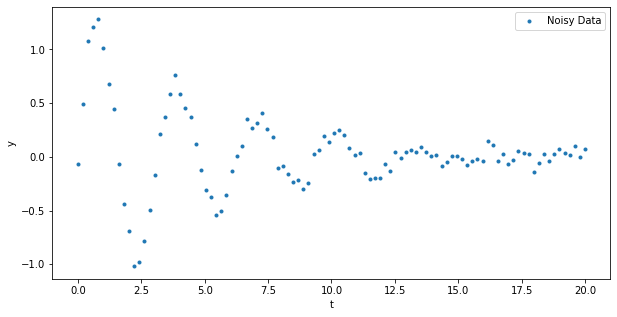

In [ ]:
A=1.5
tau=5
omega=2

t = np.linspace(0,20,100)
y=A*np.exp((-t)/tau)*np.sin(omega*t)
yNoise=noiseAdd(y,0.2)

fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,5)
ax.plot(t,yNoise,'.',label="Noisy Data")
ax.set(xlabel='t',ylabel='y')
plt.legend()
plt.show()

(b) Using the procedure in discussed in class, write code using nested for loops to iterate over all three parameters and compute the sum of the error squared for each parameter triplet.

$\theta(t) = A \exp(-t/\tau)\sin(\omega t)$,

In [ ]:
import time
start = time.process_time()

n = 50
Avals=np.linspace(1,5,n)
tauvals=np.linspace(1,15,n)
omegavals=np.linspace(1,5,n)
Evals=np.zeros((n,n,n))
for i in range(len(Avals)):
  for ii in range(len(tauvals)):
    for iii in range(len(omegavals)):
      Evals[i,ii,iii]=sum((y-Avals[i]*np.exp((-t)/tauvals[ii])*np.sin(omegavals[iii]*t))**2)
end=time.process_time()

timeDiff=end-start
print('Time to run: ' + str(timeDiff))



Time to run: 4.001807777


(c) run your code and identify the minimum error indices. Use the time module to measure how long it takes your code to run if you use $50$ values for each parameter. Find the parameter values associated with the minimum error and plot the predicted curve on top of your data.

Time calculation for 50 values in code above

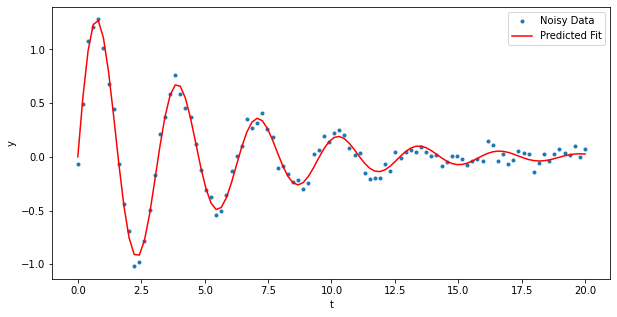

In [ ]:
minE=np.min(Evals)
idx=np.where(Evals==minE)
#print(idx[0])

fitA=Avals[idx[0]][0]
fitTau=tauvals[idx[1]][0]
fitOmega=omegavals[idx[2]][0]

yFit=fitA*np.exp((-t)/fitTau)*np.sin(fitOmega*t)



fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,5)

ax.plot(t,yNoise,'.',label="Noisy Data")
ax.plot(t,yFit,color='red', label="Predicted Fit")

ax.set(xlabel='t',ylabel='y')
plt.legend()
plt.show()



2. Now you'll use the scipy.optimize module to test the speed and accuracy of other fitting techniques.

In [ ]:
import scipy.optimize

(a) First, you'll use the minimize function with the Nelder-Mead method.  To properly format inputs, you'll need to define a function that returns the sum of the squared error for one parameter set and has the following inputs: an array of parameters, time values, and data points.

In [ ]:
def sumError(params,t,y):
  Error=sum((y-params[0]*np.exp((-t)/params[1])*np.sin(params[2]*t))**2)
  return Error

P0=np.array([1,6,3])

minimizeFit=scipy.optimize.minimize(sumError, P0, args=(t,yNoise), method= 'Nelder-Mead')

print(minimizeFit)

 final_simplex: (array([[1.4754039 , 5.0864225 , 1.99678534],
       [1.47540771, 5.08638127, 1.99678402],
       [1.47541498, 5.08634572, 1.99678652],
       [1.47540727, 5.08634003, 1.99678506]]), array([0.33608174, 0.33608174, 0.33608174, 0.33608174]))
           fun: 0.3360817425509239
       message: 'Optimization terminated successfully.'
          nfev: 181
           nit: 101
        status: 0
       success: True
             x: array([1.4754039 , 5.0864225 , 1.99678534])


(b) Next, you'll use the built-in scipy curve_fit  function.  To properly format inputs, you'll need to input the model function, and arrays of x and y data values.  What are the best-fit parameter values that this method?

In [ ]:
def modelFunction(t,A,tau,omega):
  theta=A*np.exp((-t)/tau)*np.sin(omega*t)
  return theta

curveFit=scipy.optimize.curve_fit(modelFunction,t,yNoise)

print(curveFit[0])

[1.47540538 5.08640261 1.99678544]


(c) Next, you'll use the built-in scipy least_squares  function.  To properly format inputs, you'll need to define a function that returns the deviations of the model predictions and data set for each point in the data set (for one parameter set) and has the following inputs: an array of parameter values, time values, and data points.

This function will be your first input for least_squares, followed by an array of initial parameters. You'll also need to set the ```args``` input to specify which inputs to your deviations function are not parameters. Finally, you can specify which method you want to use for the calculation.  What are the best-fit parameters predicted by this approach for ```method = 'trf'``` and ```method = 'lm'```? The best fit parameters are stored in an array called ```x``` within the returned fit object.  A couple of other useful outputs within the returned fit object are ```message``` and ```success```.

In [ ]:
def lstsqr(params,t,yNoise):
  deviation=yNoise-params[0]*np.exp((-t)/params[1])*np.sin(params[2]*t)
  return deviation

squareFittrf=scipy.optimize.least_squares(lstsqr,P0,args=(t,yNoise),method='trf')
squareFitlm=scipy.optimize.least_squares(lstsqr,P0,args=(t,yNoise),method='lm')

print(squareFittrf)
print(squareFitlm)

 active_mask: array([0., 0., 0.])
        cost: 0.16804087124343825
         fun: array([-0.06582332, -0.06453307,  0.09800709, -0.02126535,  0.02162982,
       -0.0778132 , -0.0868558 ,  0.09739841,  0.0220732 ,  0.04467777,
        0.0796215 , -0.10273267, -0.07074104, -0.02374236,  0.00355695,
        0.01399361,  0.07571513, -0.03307351, -0.01590071,  0.08460475,
       -0.0660794 , -0.07025981,  0.04471721,  0.03433989,  0.02373842,
        0.0306895 ,  0.08457293, -0.03857469, -0.04422976,  0.00413757,
        0.06463056,  0.03000389, -0.04262236,  0.08618445, -0.08050559,
       -0.05041209,  0.08397037,  0.02049777,  0.05980574, -0.09588344,
        0.04228428,  0.05342944,  0.03075038,  0.05248414, -0.06734421,
       -0.08656092,  0.09676618,  0.0381461 ,  0.08923771, -0.02558221,
        0.02524026,  0.05800019,  0.03975671, -0.02066508, -0.0213621 ,
        0.06609067, -0.05877954, -0.08142942, -0.05629577, -0.05792471,
        0.0457606 , -0.06489324,  0.06473863, -0.04117

Both functions return parameters of [1.5, 5, 2]

(d) explore the sensitivity to the outputs mentioned in part (c) to the initial guess. Can you find a set of initial guess that gives different best-fit parameters? What happens to the other outputs?

In [ ]:
P0_test=np.array([40,40,40])

squareFittrf=scipy.optimize.least_squares(lstsqr,P0_test,args=(t,yNoise),method='trf')
squareFitlm=scipy.optimize.least_squares(lstsqr,P0_test,args=(t,yNoise),method='lm')

print(squareFittrf)


 active_mask: array([0., 0., 0.])
        cost: 6.940714234126302
         fun: array([-6.58233151e-02,  5.11069209e-01,  1.07121166e+00,  1.19127699e+00,
        1.29726017e+00,  1.01606530e+00,  6.61206150e-01,  4.55084053e-01,
       -5.48702307e-02, -4.56914226e-01, -6.97726040e-01, -1.00020217e+00,
       -9.85323412e-01, -7.99024664e-01, -4.83428256e-01, -1.65511545e-01,
        1.88981282e-01,  3.78544524e-01,  6.00495922e-01,  7.52283369e-01,
        5.75346697e-01,  4.71585303e-01,  3.65790903e-01,  1.02051426e-01,
       -1.09036576e-01, -2.92162448e-01, -3.93124702e-01, -5.42483703e-01,
       -4.88297546e-01, -3.61031709e-01, -1.50468617e-01,  2.10854292e-02,
        1.00641091e-01,  3.36108628e-01,  2.75234757e-01,  3.32989592e-01,
        3.95241154e-01,  2.52845918e-01,  2.00488212e-01, -1.07889464e-01,
       -1.00154902e-01, -1.46112557e-01, -2.22544472e-01, -2.33983107e-01,
       -2.94660531e-01, -2.26457018e-01,  1.57166928e-02,  5.15016444e-02,
        2.15862465e-

Under "normal" initial conditions relatively close to the final parameters, we observe that the calculated parameters converge close to the expected values of (1.5,5,2). The "message" line reads '`ftol` termination condition is satisfied'.


When we change the initial conditions drastically, we observe that the calculated best fit parameters can diverge from the expected values. We tested the initial condition (A=40, Tau=40, Omega=40) and calculated the final parameters of (-1.98078097e-02, -7.38175432e+02,  4.03008858e+01). In addition, the "cost" of the calclculation increases significantly. 